## Mounting Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Downloading Fruit-And-Vegetable-Image-Recognition Dataset

In [2]:
!kaggle datasets download -d kritikseth/fruit-and-vegetable-image-recognition

Dataset URL: https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition
License(s): CC0-1.0
100% 1.98G/1.98G [01:09<00:00, 30.1MB/s]
100% 1.98G/1.98G [01:09<00:00, 30.8MB/s]


# Unzip The Downloaded File

In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/fruit-and-vegetable-image-recognition.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

# **Step 1: Import All Required Libraries**

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# **Step 2 : Data Preprocessing**

In [2]:
#Training image preprocessing
training_set= tf.keras.utils.image_dataset_from_directory(
    '/content/train',
    labels = 'inferred',
    label_mode= 'categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(180,180),
    shuffle= True,
    seed=None,
    validation_split=None
)


Found 3115 files belonging to 36 classes.


In [3]:
#Validation image preprocessing
validation_set= tf.keras.utils.image_dataset_from_directory(
    '/content/validation',
    labels = 'inferred',
    label_mode= 'categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(180,180),
    shuffle= True,
    seed=None,
    validation_split=None
)

Found 351 files belonging to 36 classes.


In [4]:
#Testing image preprocessing
test_set= tf.keras.utils.image_dataset_from_directory(
    '/content/test',
    labels = 'inferred',
    label_mode= 'categorical',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(180,180),
    shuffle= True,
    seed=None,
    validation_split=None
)

Found 359 files belonging to 36 classes.


In [5]:
training_set.class_names

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

#**Step 3 : Building Model**

In [12]:
cnn= tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Rescaling(scale=1./255   , input_shape=[180,180,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=256, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.2))

cnn.add(tf.keras.layers.Dense(units=36, activation='softmax'))

# **Step 4 : Compiling Phase And Summary Of The Model**

In [13]:
cnn.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 43, 43, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 41, 41, 64)       

# **Step 5 : Training Of Model**

In [14]:
training_history= cnn.fit(x=training_set, validation_data=validation_set, epochs=20)

Epoch 1/20
98/98 [==============================] - 272s 3s/step - loss: 3.3525 - accuracy: 0.0787 - val_loss: 2.8121 - val_accuracy: 0.1624
Epoch 2/20
98/98 [==============================] - 264s 3s/step - loss: 2.7817 - accuracy: 0.1766 - val_loss: 2.1056 - val_accuracy: 0.3761
Epoch 3/20
98/98 [==============================] - 263s 3s/step - loss: 2.4157 - accuracy: 0.2828 - val_loss: 1.6594 - val_accuracy: 0.4957
Epoch 4/20
98/98 [==============================] - 264s 3s/step - loss: 2.1825 - accuracy: 0.3278 - val_loss: 1.5850 - val_accuracy: 0.5242
Epoch 5/20
98/98 [==============================] - 268s 3s/step - loss: 1.9532 - accuracy: 0.4013 - val_loss: 1.0838 - val_accuracy: 0.7037
Epoch 6/20
98/98 [==============================] - 263s 3s/step - loss: 1.6781 - accuracy: 0.4815 - val_loss: 1.0280 - val_accuracy: 0.7066
Epoch 7/20
98/98 [==============================] - 263s 3s/step - loss: 1.3821 - accuracy: 0.5740 - val_loss: 0.7193 - val_accuracy: 0.7949
Epoch 8/20
98

# **Step 6 : Saving The Trained Model**

In [15]:
cnn.save('Model5_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# **Step 7 : Recording History Of The Model**

In [16]:
#Recording History
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [17]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [18]:
print("Validation Set Accuracy: {} %" .format(training_history.history['val_accuracy'][-1]*100))

print("Training Set Accuracy: {} %" .format(training_history.history['accuracy'][-1]*100))

Validation Set Accuracy: 96.58119678497314 %
Training Set Accuracy: 95.92295289039612 %


# **Step 8 : Visualization Of Training And Validation Accuracy**

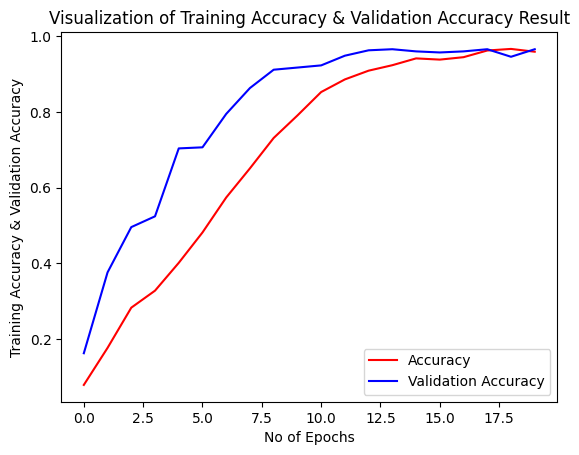

In [19]:
epochs=[i for i in range (1,20)]
plt.plot(training_history.history['accuracy'],color='red',label='Accuracy')
plt.plot(training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No of Epochs')
plt.ylabel('Training Accuracy & Validation Accuracy')
plt.title('Visualization of Training Accuracy & Validation Accuracy Result')
plt.legend()
plt.show()

# **Visualization Of Training And Validation Loss**

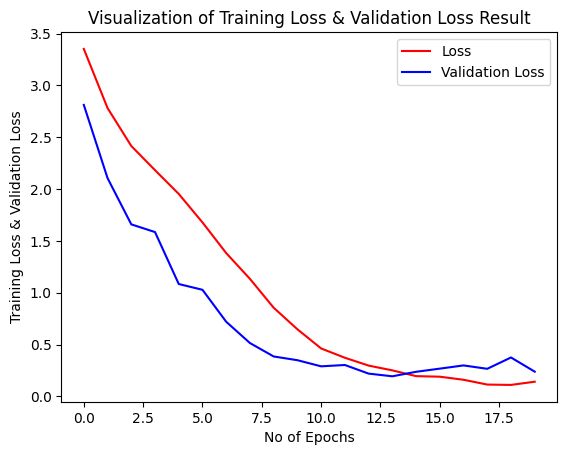

In [20]:
plt.plot(training_history.history['loss'],color='red',label='Loss')
plt.plot(training_history.history['val_loss'],color='blue',label='Validation Loss')
plt.xlabel('No of Epochs')
plt.ylabel('Training Loss & Validation Loss')
plt.title('Visualization of Training Loss & Validation Loss Result')
plt.legend()
plt.show()

# **Step 9 : Evaluating the Model**

In [21]:
#Evalaution of Training set
loss,accuracy=cnn.evaluate(training_set)

98/98 [==============================] - 121s 1s/step - loss: 0.0392 - accuracy: 0.9888


In [22]:
#Evaluation of Validation set
val_loss,val_accuracy=cnn.evaluate(validation_set)

11/11 [==============================] - 17s 616ms/step - loss: 0.2379 - accuracy: 0.9658


In [23]:
#Evaluation of Test set
test_loss,test_accuracy=cnn.evaluate(test_set)

12/12 [==============================] - 19s 710ms/step - loss: 0.2332 - accuracy: 0.9666


In [24]:
test_accuracy*100

96.65738344192505

# **Step 10 : Creating Classification Report And Confusion Matrix**

1/1 [==============================] - 0s 363ms/step
Classification Report:
                precision    recall  f1-score   support

        apple       1.00      0.70      0.82        10
       banana       1.00      0.89      0.94         9
     beetroot       1.00      1.00      1.00        10
  bell pepper       0.83      1.00      0.91        10
      cabbage       1.00      1.00      1.00        10
     capsicum       1.00      0.90      0.95        10
       carrot       0.90      0.90      0.90        10
  cauliflower       1.00      1.00      1.00        10
chilli pepper       0.90      0.90      0.90        10
         corn       0.83      1.00      0.91        10
     cucumber       1.00      1.00      1.00        10
     eggplant       1.00      1.00      1.00        10
       garlic       1.00      1.00      1.00        10
       ginger       0.91      1.00      0.95        10
       grapes       1.00      1.00      1.00        10
     jalepeno       0.91      1.00      0.

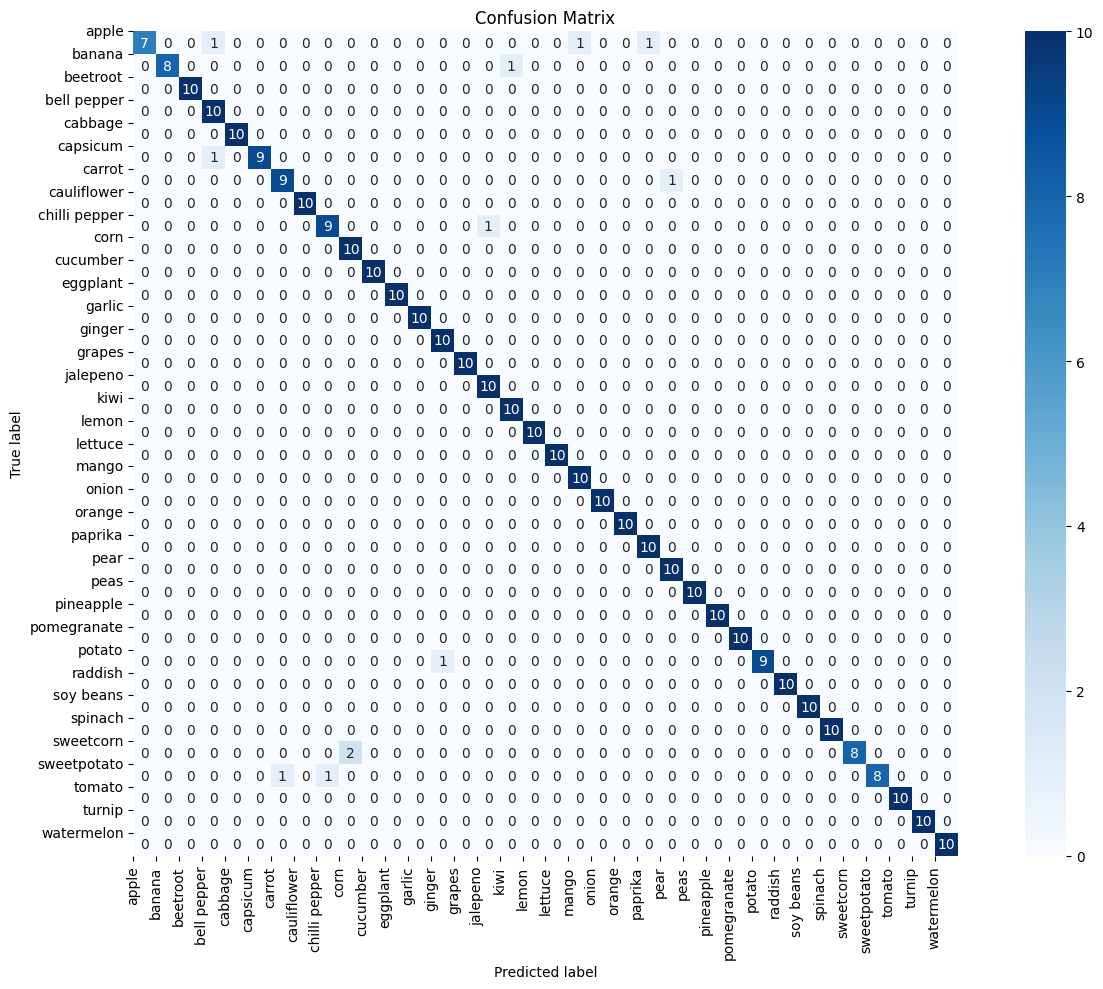

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
# Load the saved model
loaded_model = tf.keras.models.load_model('/content/Model5_model.h5')

# Initialize variables to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Iterate through the test set and make predictions
for images, labels in test_set:
    true_labels.extend(np.argmax(labels, axis=1))  # Get true labels
    predictions = loaded_model.predict(images)
    predicted_labels.extend(np.argmax(predictions, axis=1))  # Get predicted labels

# Create a classification report
class_names = test_set.class_names
report = classification_report(true_labels, predicted_labels, target_names=class_names)

# Print the classification report
print("Classification Report:\n", report)

# Create a confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(14,10))
    sns.heatmap(cm,annot=True,fmt='d',cmap="Blues")
    plt.imshow(cm, cmap="Blues",alpha=0.9)
    plt.title('Confusion Matrix')
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=90)
    plt.yticks(tick_marks, class_names,rotation=0)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

plot_confusion_matrix(confusion, class_names)


# **Step 11 : Performing Prediction On Some Test_Set Images**

1/1 [==============================] - 1s 917ms/step


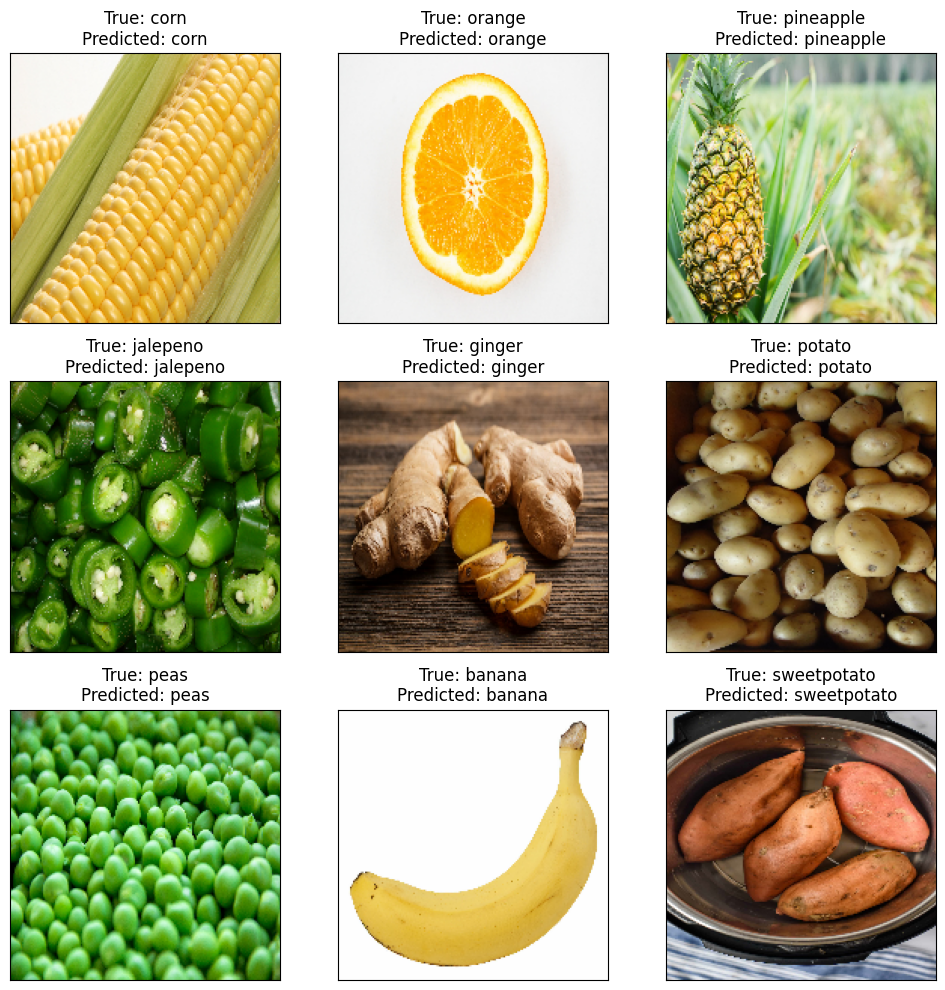

In [26]:

# Retrieve a few test samples and their corresponding true labels
num_samples_to_display = 9
sample_images, sample_labels = next(iter(test_set.take(num_samples_to_display)))

# Get the corresponding class names from the test_set
class_names = test_set.class_names

# Make predictions on the sampled images
sample_predictions = cnn.predict(sample_images)
sample_predictions = np.argmax(sample_predictions, axis=1)

# Display the images with their true and predicted labels
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10),
                         subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(sample_images[i].numpy().astype(np.uint8))
    true_label = class_names[np.argmax(sample_labels[i])]
    predicted_label = class_names[sample_predictions[i]]
    ax.set_title(f"True: {true_label}\nPredicted: {predicted_label}")

plt.tight_layout()
plt.show()